In [15]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='wRRvpIAzUR7-vh3jo5cNEsr2ugGtjqeOZ2qXDm3Ohi1l',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud')

bucket = 'jupyternotebook-donotdelete-pr-lsi5qln9pcsykf'
object_key = 'fault_data.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_1 = pd.read_csv(body)
df_1.head(10)


,Fault ID,Fault Type,"Fault Location (Latitude, Longitude)",Voltage (V),Current (A),Power Load (MW),Temperature (°C),Wind Speed (km/h),Weather Condition,Maintenance Status,Component Health,Duration of Fault (hrs),Down time (hrs)
0,F001,Line Breakage,"(34.0522, -118.2437)",2200,250,50,25,20,Clear,Scheduled,Normal,2.0,1.0
1,F002,Transformer Failure,"(34.056, -118.245)",1800,180,45,28,15,Rainy,Completed,Faulty,3.0,5.0
2,F003,Overheating,"(34.0525, -118.244)",2100,230,55,35,25,Windstorm,Pending,Overheated,4.0,6.0
3,F004,Line Breakage,"(34.055, -118.242)",2050,240,48,23,10,Clear,Completed,Normal,2.5,3.0
4,F005,Transformer Failure,"(34.0545, -118.243)",1900,190,50,30,18,Snowy,Scheduled,Faulty,3.5,4.0
5,F006,Overheating,"(34.05, -118.24)",2150,220,52,32,22,Thunderstorm,Pending,Overheated,5.0,7.0
6,F007,Line Breakage,"(34.9449, -118.9839)",1994,233,51,23,21,Snowy,Completed,Normal,3.7,6.1
7,F008,Transformer Failure,"(34.2294, -118.2988)",2133,229,52,20,18,Snowy,Scheduled,Normal,5.4,2.1
8,F009,Line Breakage,"(34.1279, -118.8442)",2155,240,45,21,29,Rainy,Pending,Overheated,3.2,4.7
9,F010,Line Breakage,"(34.4192, -118.8254)",2065,199,55,25,21,Clear,Scheduled,Normal,4.0,2.8


In [16]:
import os
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

# Define a dummy __iter__ so the CSV body is iterable
def __iter__(self): return 0

# Initialize IBM COS client
cos_client = ibm_boto3.client(
    service_name='s3',
    ibm_api_key_id='wRRvpIAzUR7-vh3jo5cNEsr2ugGtjqeOZ2qXDm3Ohi1l',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.direct.us-south.cloud-object-storage.appdomain.cloud'
)

# Load the CSV file
bucket = 'jupyternotebook-donotdelete-pr-lsi5qln9pcsykf'
object_key = 'fault_data.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Patch body so pandas accepts it
if not hasattr(body, "__iter__"):
    body.__iter__ = types.MethodType(__iter__, body)

# Load CSV into dataframe
df_1 = pd.read_csv(body)

# Preview the dataset
print("===== First 5 Rows of Dataset =====")
print(df_1.head())
print("===== Columns =====")
print(df_1.columns)


===== First 5 Rows of Dataset =====
  Fault ID           Fault Type Fault Location (Latitude, Longitude)  \
0     F001        Line Breakage                 (34.0522, -118.2437)   
1     F002  Transformer Failure                   (34.056, -118.245)   
2     F003          Overheating                  (34.0525, -118.244)   
3     F004        Line Breakage                   (34.055, -118.242)   
4     F005  Transformer Failure                  (34.0545, -118.243)   

   Voltage (V)  Current (A)  Power Load (MW)  Temperature (°C)  \
0         2200          250               50                25   
1         1800          180               45                28   
2         2100          230               55                35   
3         2050          240               48                23   
4         1900          190               50                30   

   Wind Speed (km/h) Weather Condition Maintenance Status Component Health  \
0                 20             Clear          Schedule

In [17]:
df = df_1.copy()


In [18]:
df = df.drop(columns=['Fault ID', 'Fault Location (Latitude, Longitude)'])


In [19]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['Fault Type', 'Weather Condition', 'Maintenance Status', 'Component Health']
le = LabelEncoder()

for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [20]:
print("===== Cleaned Dataset (First 5 rows) =====")
print(df.head())


===== Cleaned Dataset (First 5 rows) =====
   Fault Type  Voltage (V)  Current (A)  Power Load (MW)  Temperature (°C)  \
0           0         2200          250               50                25   
1           2         1800          180               45                28   
2           1         2100          230               55                35   
3           0         2050          240               48                23   
4           2         1900          190               50                30   

   Wind Speed (km/h)  Weather Condition  Maintenance Status  Component Health  \
0                 20                  0                   2                 1   
1                 15                  1                   0                 0   
2                 25                  4                   1                 2   
3                 10                  0                   0                 1   
4                 18                  2                   2                 0   

 

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop('Fault Type', axis=1)
y = df['Fault Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)
print("===== Classification Report =====")
print(classification_report(y_test, y_pred))

print("===== Accuracy Score =====")
print("Accuracy:", accuracy_score(y_test, y_pred))


===== Classification Report =====
              precision    recall  f1-score   support

           0       0.34      0.29      0.32        34
           1       0.34      0.38      0.36        34
           2       0.29      0.29      0.29        34

    accuracy                           0.32       102
   macro avg       0.32      0.32      0.32       102
weighted avg       0.32      0.32      0.32       102

===== Accuracy Score =====
Accuracy: 0.3235294117647059


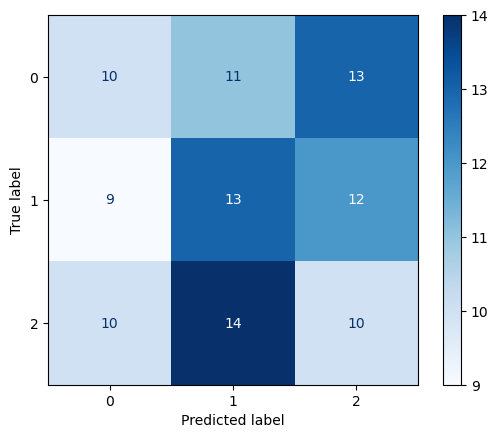

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")


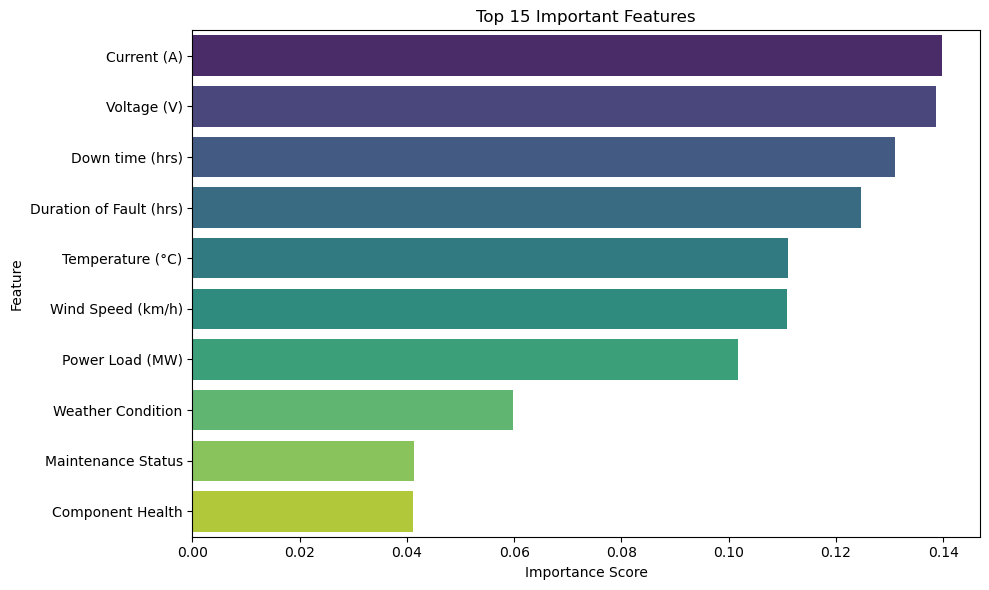

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for better plotting
feat_importances = pd.Series(importances, index=X_train.columns)

# Sort and plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:15], 
            y=feat_importances.sort_values(ascending=False).index[:15], 
            palette="viridis")
plt.title("Top 15 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


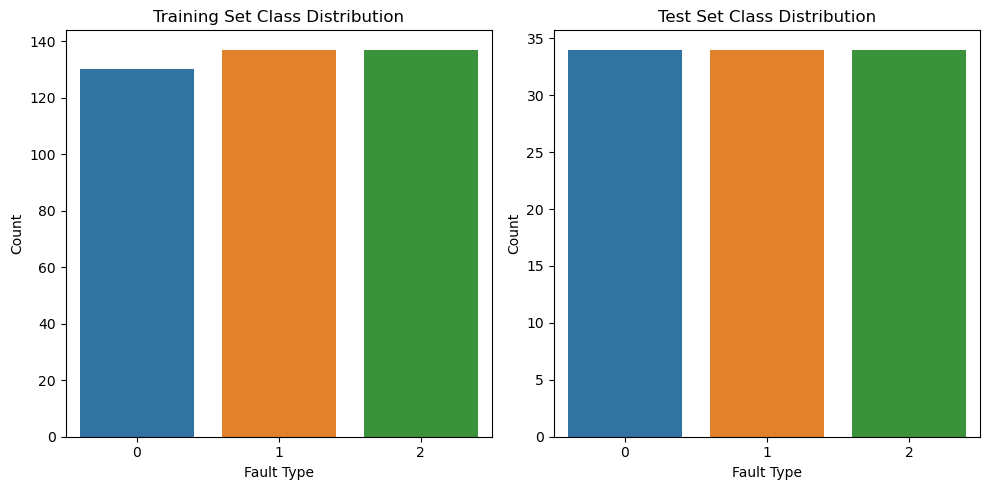

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `y_train` and `y_test` are defined
plt.figure(figsize=(10, 5))

# Training set distribution
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.xlabel("Fault Type")
plt.ylabel("Count")

# Test set distribution
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Test Set Class Distribution")
plt.xlabel("Fault Type")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


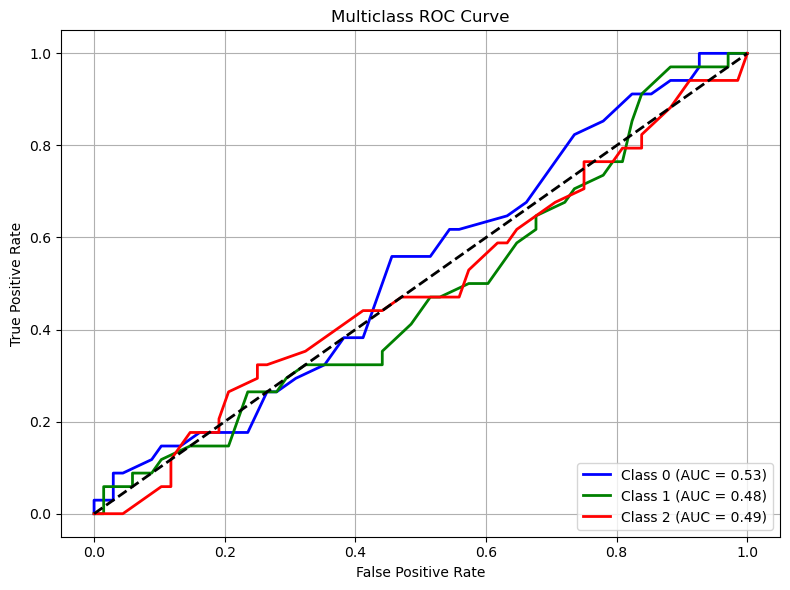

In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# Binarize the output (for ROC curve)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_train_bin = label_binarize(y_train, classes=[0, 1, 2])

# Train model using OneVsRest strategy
clf_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))
clf_ovr.fit(X_train, y_train_bin)

# Predict probabilities
y_score = clf_ovr.predict_proba(X_test)

# Plot ROC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Accuracy
from sklearn.metrics import accuracy_score
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.38235294117647056


In [34]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.35294117647058826


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


/opt/conda/envs/Python-RT24.1/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.4020
Decision Tree Accuracy: 0.3529
Random Forest Accuracy: 0.3235
KNN Accuracy: 0.3627
SVM Accuracy: 0.4020
Naive Bayes Accuracy: 0.3333


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Build pipeline: Scaling + Logistic Regression
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=5000)
)

# Train and test
logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred)

print(f"Logistic Regression (Scaled) Accuracy: {logreg_accuracy:.4f}")


Logistic Regression (Scaled) Accuracy: 0.3824


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Models with scaling
models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=5000)),
    "SVM": make_pipeline(StandardScaler(), SVC()),
    "KNN": make_pipeline(StandardScaler(), KNeighborsClassifier()),

    # Models that don’t need scaling
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.3824
SVM Accuracy: 0.3824
KNN Accuracy: 0.3627
Decision Tree Accuracy: 0.3529
Random Forest Accuracy: 0.3235
Naive Bayes Accuracy: 0.3333


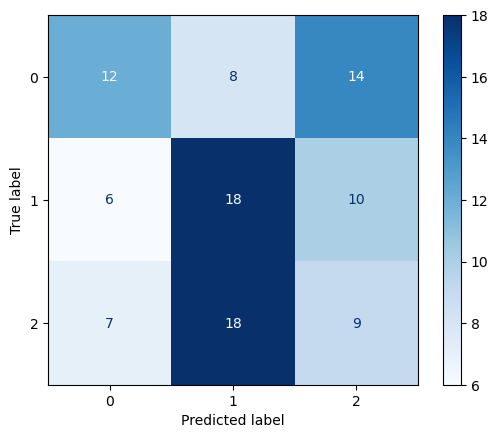

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict again to ensure consistent results
y_pred = models["Logistic Regression"].predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')


In [39]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation with Logistic Regression pipeline
logreg_cv_scores = cross_val_score(models["Logistic Regression"], X_train, y_train, cv=5)

# Print scores
print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Mean CV Accuracy: {:.4f}".format(logreg_cv_scores.mean()))


Logistic Regression Cross-Validation Scores: [0.34567901 0.2962963  0.37037037 0.30864198 0.3125    ]
Mean CV Accuracy: 0.3267


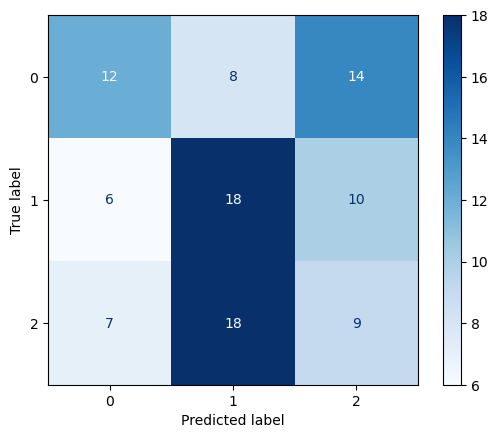

In [40]:
disp.plot(cmap='Blues')


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.35      0.41        34
           1       0.41      0.53      0.46        34
           2       0.27      0.26      0.27        34

    accuracy                           0.38       102
   macro avg       0.39      0.38      0.38       102
weighted avg       0.39      0.38      0.38       102



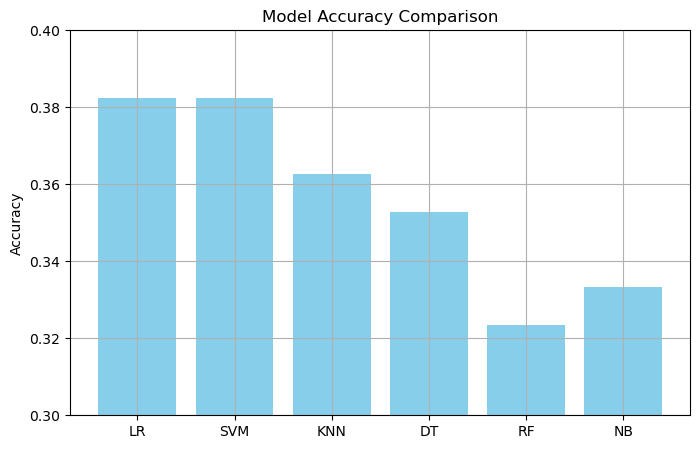

In [42]:
import matplotlib.pyplot as plt

models = ['LR', 'SVM', 'KNN', 'DT', 'RF', 'NB']
scores = [0.3824, 0.3824, 0.3627, 0.3529, 0.3235, 0.3333]

plt.figure(figsize=(8,5))
plt.bar(models, scores, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0.3, 0.4])
plt.grid(True)
plt.show()


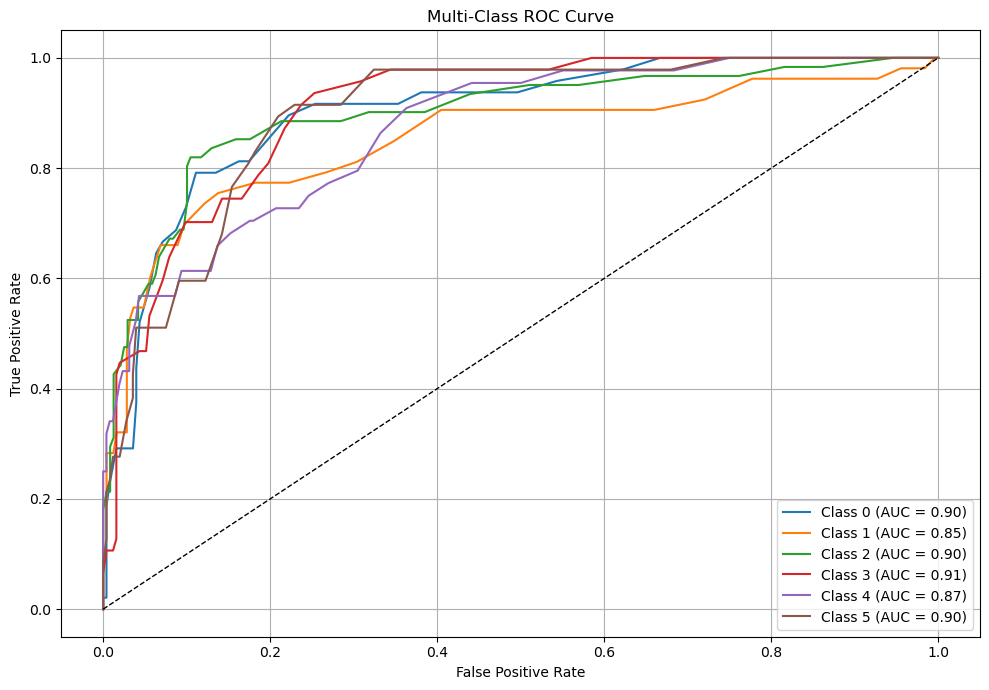

In [46]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# --------------------
# 1. Dummy data setup (replace this with your actual X, y)
# --------------------
X, y = make_classification(n_samples=1000, n_features=20, n_classes=6, 
                           n_informative=10, n_redundant=0, 
                           random_state=42)

# --------------------
# 2. Train-test split
# --------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --------------------
# 3. Train your model
# --------------------
model = RandomForestClassifier()
model.fit(X_train, y_train)

# --------------------
# 4. Predict probabilities
# --------------------
y_score = model.predict_proba(X_test)  # shape: (n_samples, n_classes)

# --------------------
# 5. Binarize the labels (One-hot encoding for ROC)
# --------------------
classes = [0, 1, 2, 3, 4, 5]
y_test_bin = label_binarize(y_test, classes=classes)

# --------------------
# 6. Compute ROC and AUC for each class
# --------------------
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --------------------
# 7. Plot ROC curve for each class
# --------------------
plt.figure(figsize=(10, 7))
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


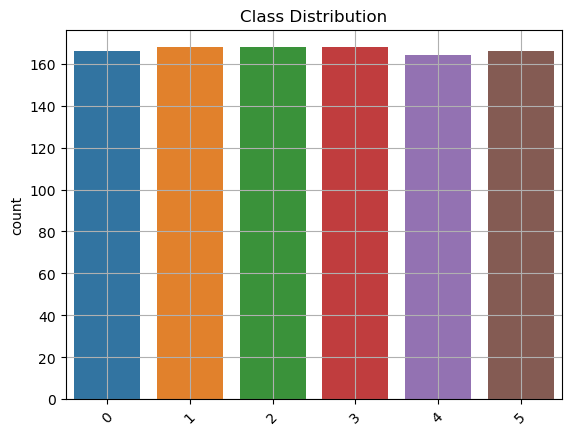

In [48]:
import seaborn as sns
sns.countplot(x=y)  # y = target column
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.grid()
plt.show()


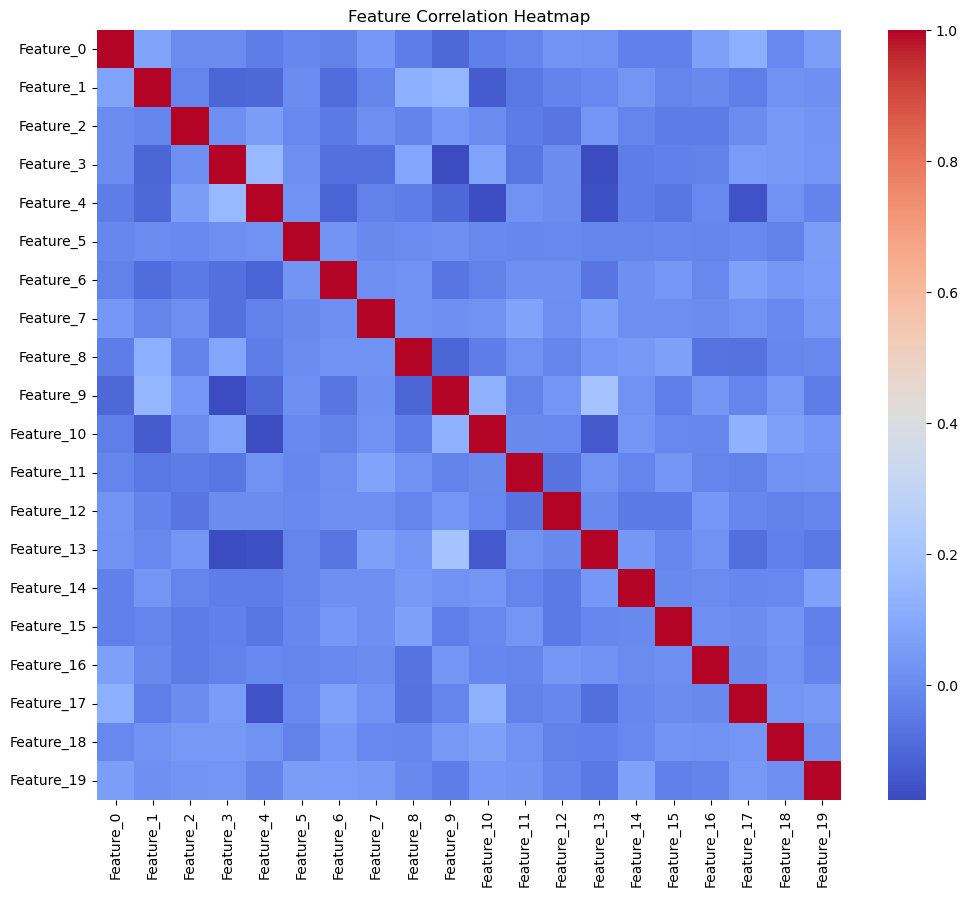

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dummy feature names to match X's shape (20 features)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]

# Convert X to DataFrame for correlation
X_df = pd.DataFrame(X, columns=feature_names)

# Compute correlation
corr = X_df.corr()

# Plot
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


In [53]:
# Print sample predictions for fault classification
sample_inputs = X_test[:10]
sample_predictions = model.predict(sample_inputs)

print("Sample Predictions:")
for i in range(len(sample_inputs)):
    print(f"Input: {sample_inputs[i]} → Predicted Fault Type: {sample_predictions[i]}")


Sample Predictions:
Input: [-4.4099813  -0.97185439  0.13537567 -0.7862427   4.00572729 -1.01166017
  0.23003817 -0.33476154 -1.38941052  2.02480248 -2.29277932 -1.95791051
 -1.06970108 -2.13674501  1.05753854 -1.4142482   2.24430029 -1.33209091
  0.90784934  1.79201336] → Predicted Fault Type: 2
Input: [-0.23487687  1.71120304  0.06229523 -4.0352872   1.22050162  0.31404153
 -2.56912575  1.19419609 -4.22973075  1.05594481 -2.16412621  0.40207343
 -1.01219342  4.12621215  0.21735984 -2.00996411 -0.75048239  0.55485935
  0.09163203  0.39372168] → Predicted Fault Type: 4
Input: [-3.71299995 -0.21595393 -2.11370439 -4.21703423 -1.64443704 -0.80402155
 -4.35435092 -0.17272943  4.67959881 -2.43446445  2.08295349  0.56474736
 -0.76000378  0.64426189 -0.71600661  0.45660418 -0.88783545 -3.22270926
 -0.30626056  0.4714295 ] → Predicted Fault Type: 3
Input: [ 0.72120953  2.01707572 -0.21547294 -2.00803913 -1.30458822  1.03736724
 -0.06714963  0.2032935   2.53780062 -1.82901215  1.43948585 -0.32

In [54]:
for i in range(10):
    print(f"Input: {X_test[i]} → True: {y_test[i]}, Predicted: {y_pred[i]}")


Input: [-4.4099813  -0.97185439  0.13537567 -0.7862427   4.00572729 -1.01166017
  0.23003817 -0.33476154 -1.38941052  2.02480248 -2.29277932 -1.95791051
 -1.06970108 -2.13674501  1.05753854 -1.4142482   2.24430029 -1.33209091
  0.90784934  1.79201336] → True: 5, Predicted: 1
Input: [-0.23487687  1.71120304  0.06229523 -4.0352872   1.22050162  0.31404153
 -2.56912575  1.19419609 -4.22973075  1.05594481 -2.16412621  0.40207343
 -1.01219342  4.12621215  0.21735984 -2.00996411 -0.75048239  0.55485935
  0.09163203  0.39372168] → True: 1, Predicted: 1
Input: [-3.71299995 -0.21595393 -2.11370439 -4.21703423 -1.64443704 -0.80402155
 -4.35435092 -0.17272943  4.67959881 -2.43446445  2.08295349  0.56474736
 -0.76000378  0.64426189 -0.71600661  0.45660418 -0.88783545 -3.22270926
 -0.30626056  0.4714295 ] → True: 3, Predicted: 2
Input: [ 0.72120953  2.01707572 -0.21547294 -2.00803913 -1.30458822  1.03736724
 -0.06714963  0.2032935   2.53780062 -1.82901215  1.43948585 -0.32293327
 -0.70278795  0.271